<a href="https://colab.research.google.com/github/RC-RX-DEV-AUX/DataScienceCourseFullLabs/blob/main/Aulas_135_136_STD_e_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [4]:
data_frame = pd.read_csv("Salestrain.csv")
dataframe = data_frame["data"].values
data_frame.shape

(96, 1)

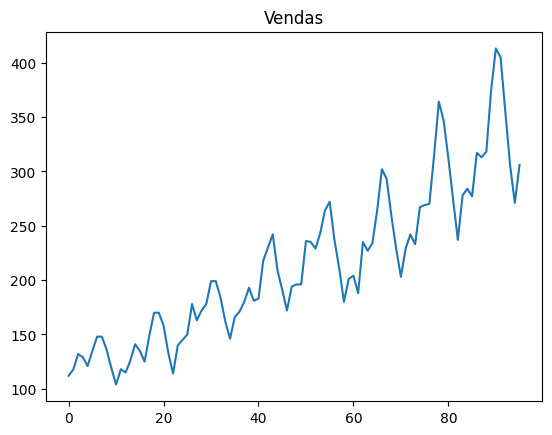

In [5]:
plt.plot(data_frame, label = "dados")
plt.title("Vendas")
plt.show()

In [6]:
stl_mod_obj = STL(data_frame,period = 12)
result = stl_mod_obj.fit()
result.resid

,resid
0,0.388358
1,-2.507507
2,-0.936252
3,2.141628
4,1.954570
...,...
91,3.588862
92,-0.686250
93,-2.434117
94,-0.019034


In [8]:
anomalies = np.where(np.abs(result.resid) > 2.5 * np.std(result.resid))[0]

In [9]:
anomalies

array([51, 61])

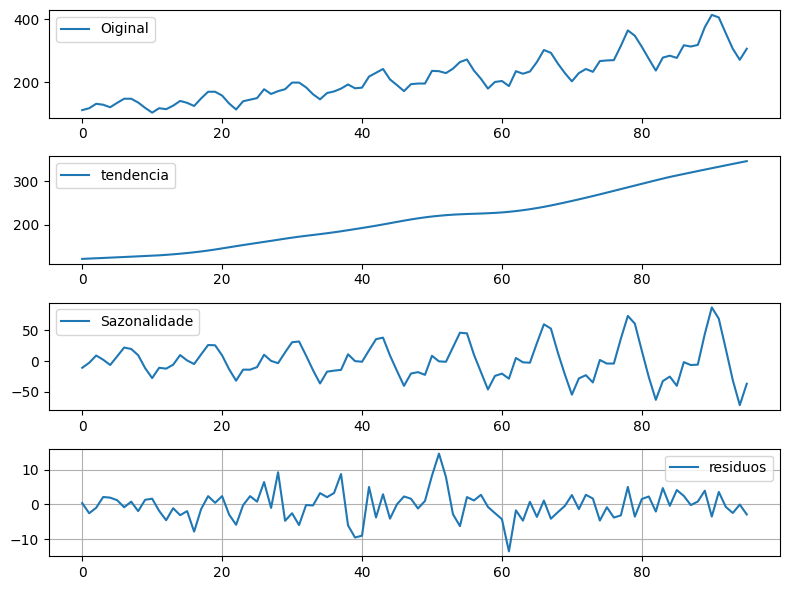

In [12]:
plt.figure(figsize = (8,6))

plt.subplot(411)
plt.plot(data_frame, label = "Oiginal")
#plt.plot(anomalies, data_frame[anomalies], 'ro', markersize = 6, label = "Anomalias")
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(result.trend, label = "tendencia")
plt.legend(loc = "best")

plt.subplot(413)
plt.plot(result.seasonal, label = "Sazonalidade")
plt.legend(loc = "best")

plt.subplot(414)
plt.plot(result.resid, label = "residuos")
plt.legend(loc = "best")


plt.grid(True)
plt.tight_layout()
plt.show()

<h1><mark>Aula 136 --> Mesmo objetivo com ARIMA</mark></h1>
<hr>

In [13]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.5 MB/s eta 0:00:00


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [15]:
data_frame = pd.read_csv("Salestrain.csv")
data_frame = data_frame["data"].values
data_frame.shape

(96,)

In [16]:
modelo_obj = auto_arima(data_frame, seasonal = True, m = 12, trace  = False)
print(modelo_obj.order)

(1, 1, 0)


In [17]:
modelo_obj = ARIMA(data_frame, order = (1,1,0))
modelo_fit = modelo_obj.fit()

In [20]:
residuals = modelo_fit.resid

In [21]:
anomalies = np.where(np.abs(residuals) > 2 * np.std(residuals))[0]

In [22]:
anomalies

array([ 0, 62, 83, 89])

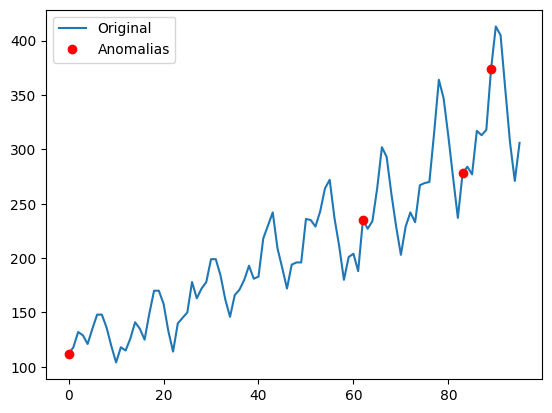

In [25]:
plt.plot(data_frame, label = "Original")
plt.plot(anomalies, data_frame[anomalies], 'ro', markersize = 6, label = "Anomalias")
plt.legend()
plt.show()